# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#weather_api_key = "f49effebb7db321fbe2e1b52cc0aaa46"
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [59]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 627


[{'City': 'carnarvon',
  'Lat': -24.8667,
  'Lng': 113.6333,
  'Max Temp': 297.36,
  'Humidity': 297.36,
  'Cloudiness': 92,
  'Wind Speed': 6.2,
  'Country': 'AU',
  'Date': 1680450429}]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
   
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | buraydah
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | santa cruz
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | zhemchuzhnyy
City not found. Skipping...
Processing Record 11 of Set 1 | kapit
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | viedma
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | marsh harbour
Processing Record 17 of Set 1 | pringsewu
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | faya
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | 

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,296.33,91,40,1.54,US,1680452164
1,buraydah,26.3260,43.9750,293.88,15,0,4.61,SA,1680451973
2,rikitea,-23.1203,-134.9692,300.12,80,34,6.86,PF,1680452164
3,mahebourg,-20.4081,57.7000,300.51,89,75,3.60,MU,1680452165
4,bluff,-46.6000,168.3333,284.66,73,92,4.76,NZ,1680452165


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,296.33,91,40,1.54,US,1680452164
1,buraydah,26.3260,43.9750,293.88,15,0,4.61,SA,1680451973
2,rikitea,-23.1203,-134.9692,300.12,80,34,6.86,PF,1680452164
3,mahebourg,-20.4081,57.7000,300.51,89,75,3.60,MU,1680452165
4,bluff,-46.6000,168.3333,284.66,73,92,4.76,NZ,1680452165


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

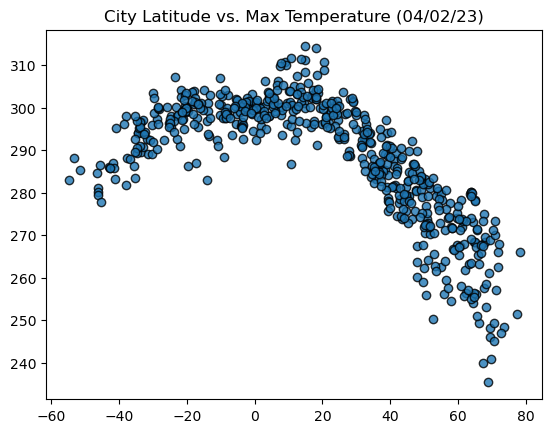

In [67]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

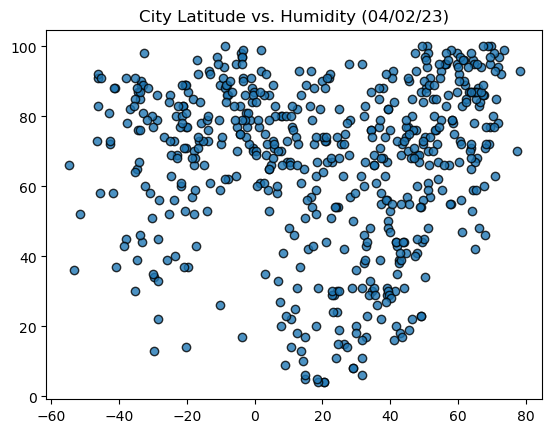

In [68]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

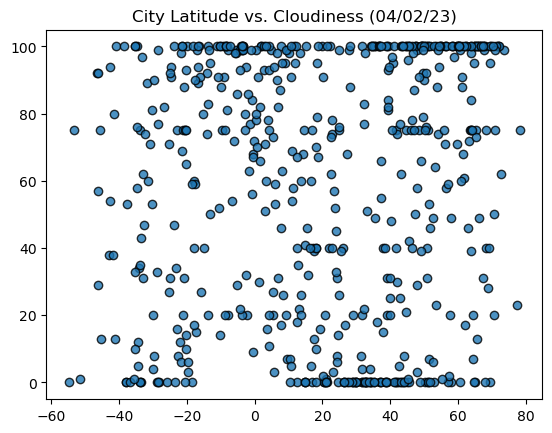

In [69]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

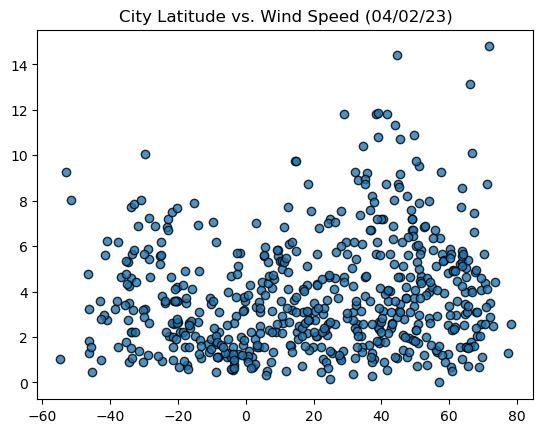

In [70]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.plot(x_values,regress_values,"r-")

    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,296.33,91,40,1.54,US,1680452164
1,buraydah,26.3260,43.9750,293.88,15,0,4.61,SA,1680451973
6,tiksi,71.6872,128.8694,262.61,78,100,14.79,RU,1680452165
9,kapit,2.0167,112.9333,295.68,99,100,0.66,MY,1680452166
13,marsh harbour,26.5412,-77.0636,298.50,75,17,5.74,BS,1680452168


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,300.12,80,34,6.86,PF,1680452164
3,mahebourg,-20.4081,57.7000,300.51,89,75,3.60,MU,1680452165
4,bluff,-46.6000,168.3333,284.66,73,92,4.76,NZ,1680452165
5,yulara,-25.2406,130.9889,296.43,52,27,5.57,AU,1680452165
7,santa cruz,-17.8000,-63.1667,303.85,66,40,1.54,BO,1680451882


###  Temperature vs. Latitude Linear Regression Plot

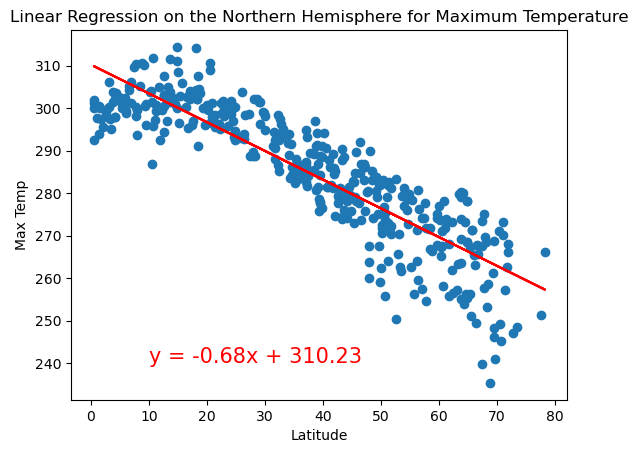

In [75]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,240))

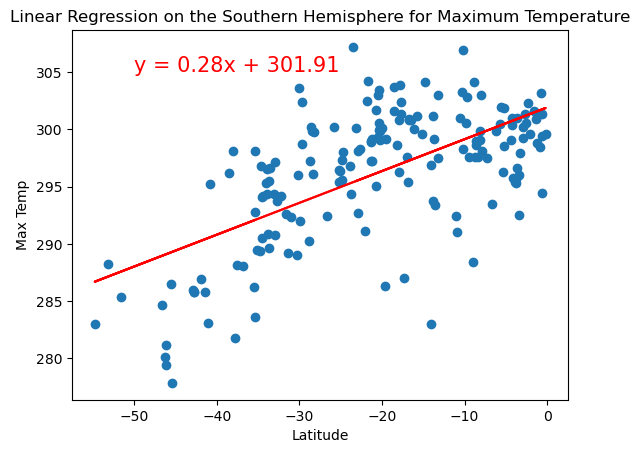

In [76]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,305))

**Discussion about the linear relationship:** looks like as you move toward 0, or the equator, the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

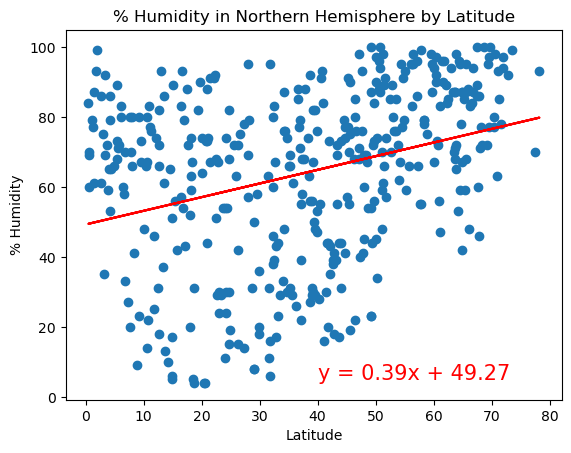

In [81]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], '% Humidity in Northern Hemisphere by Latitude', '% Humidity',(40,5))

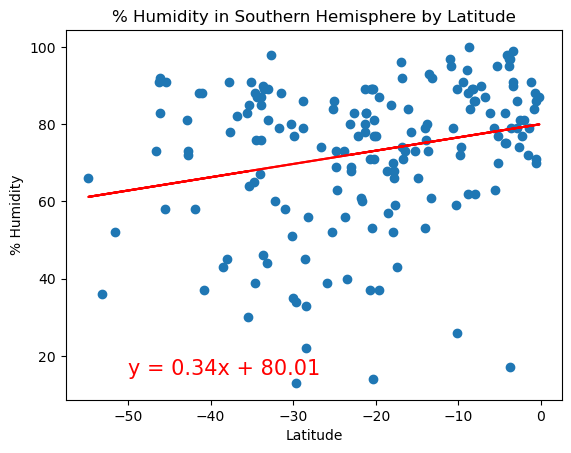

In [82]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], '% Humidity in Southern Hemisphere by Latitude', '% Humidity',(-50,15))

**Discussion about the linear relationship:** not enough of a trend in humidity fromt he data to define any real data here.  

### Cloudiness vs. Latitude Linear Regression Plot

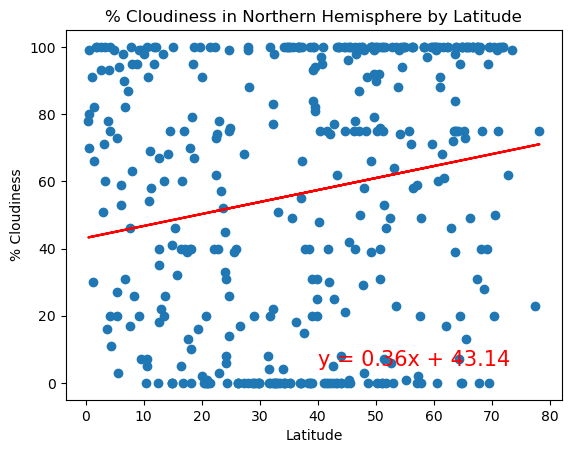

In [83]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], '% Cloudiness in Northern Hemisphere by Latitude', '% Cloudiness',(40,5))

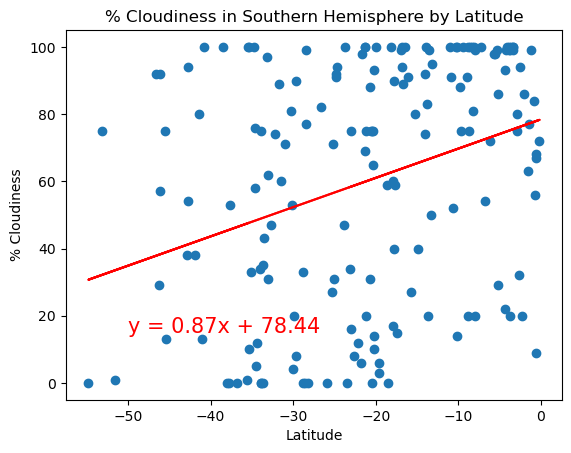

In [84]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], '% Cloudiness in Southern Hemisphere by Latitude', '% Cloudiness',(-50,15))

**Discussion about the linear relationship:** Again, we see to much variation in data to provide any kind of assumption about the trend from this data.

### Wind Speed vs. Latitude Linear Regression Plot

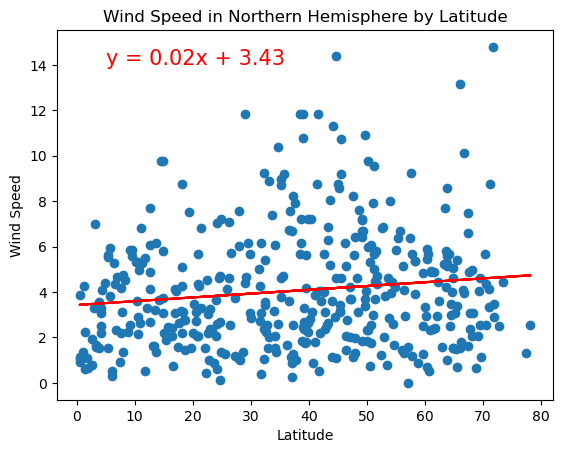

In [86]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Wind Speed in Northern Hemisphere by Latitude', 'Wind Speed',(5,14))

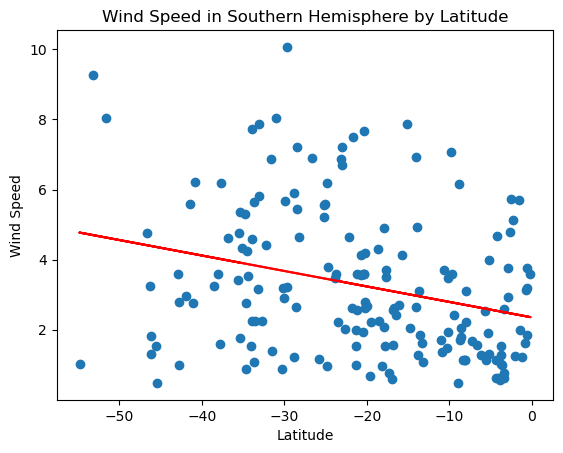

In [87]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Wind Speed in Southern Hemisphere by Latitude', 'Wind Speed',(-50,15))

**Discussion about the linear relationship:** I don't think we can really extrapolate any data from this, you may be able to say the wind speed increases as you move away from the equator, but it would be a very small margin and I don't think that it would hold up if we used more data.